# Packages and Dataset import

In [87]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import KNNImputer
from geopy.geocoders import Nominatim
import time
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/Data_companies/companies.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head(15)

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401.0,54.0,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186.0,85.0,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107.0,34.0,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,NaN,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200.0,74.0,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
5,c:10002,5,Company,10002,NaN,Synergie Media,synergie media,/company/synergie-media,advertising,operating,2007-06-27,NaN,synergie-media.com,http://www.synergie-media.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,284.0,48.0,NaN,NaN,Synergie Media is a Dutch and Moroccan Web Des...,"social-media, web-design, web-development, out...",MAR,NaN,Agadir,Agadir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2008-08-24 17:39:10,2008-09-06 14:19:19,30.427755,-9.598107,NaN
6,c:10003,6,Company,10003,NaN,Green Basti Ecosystems,green basti ecosystems,/company/green-basti-ecosystems,cleantech,operating,2008-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Creating infrastructure to provide incentives ...,"cleantech, alternative-energy, biogas, carbon-...",IND,NaN,Vadodara,Vadodara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 19:49:25,2010-04-22 23:48:20,22.307159,73.181219,NaN
7,c:100042,7,Company,100042,NaN,HostNine,hostnine,/company/hostnine,NaN,operating,NaN,NaN,hostnine.com,http://www.hostnine.com,Hostnine,http://s3.amazonaws.com/crunchbase_prod_assets...,187.0,53.0,NaN,NaN,At HostNine they are commited to continually e...,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196530 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [5]:
df.nunique()

id                     196553
Unnamed: 0.1           196553
entity_type                 1
entity_id              196553
parent_id                   0
name                   196347
normalized_name        195451
permalink              196512
category_code              42
status                      4
founded_at               6156
closed_at                 925
domain                 125498
homepage_url           125961
twitter_username        79571
logo_url               110110
logo_width               3325
logo_height              2128
short_description        7126
description             83696
overview               126515
tag_list                79133
country_code              175
state_code                 51
city                    10652
region                   5847
first_investment_at      1197
last_investment_at       1105
investment_rounds          41
invested_companies         37
first_funding_at         3208
last_funding_at          2978
funding_rounds             15
funding_to

In [6]:
#Droping useless features
df_1 = df.drop(["id", "Unnamed: 0.1","entity_type","entity_id","parent_id","name","normalized_name","permalink","domain","homepage_url","twitter_username","logo_url","short_description","description","overview","tag_list"], axis = 1)

In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   category_code        123186 non-null  object 
 1   status               196553 non-null  object 
 2   founded_at           91227 non-null   object 
 3   closed_at            2620 non-null    object 
 4   logo_width           110110 non-null  float64
 5   logo_height          110110 non-null  float64
 6   country_code         87990 non-null   object 
 7   state_code           50903 non-null   object 
 8   city                 83890 non-null   object 
 9   region               196553 non-null  object 
 10  first_investment_at  2583 non-null    object 
 11  last_investment_at   2583 non-null    object 
 12  investment_rounds    2591 non-null    float64
 13  invested_companies   2591 non-null    float64
 14  first_funding_at     31507 non-null   object 
 15  last_funding_at  

# Data cleaning

#### Handling duplicated rows 

In [8]:
df_1.duplicated().sum()

2634

In [9]:
duplicated = df_1[df_1.duplicated()]

In [10]:
duplicated

,category_code,status,founded_at,closed_at,logo_width,logo_height,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
413,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,serkantoto,2008-08-28 20:47:47,2008-08-28 20:47:47,NaN,NaN,NaN
415,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,serkantoto,2008-08-28 20:47:47,2008-08-28 20:47:47,NaN,NaN,NaN
744,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2008-09-01 23:20:23,2008-09-03 00:40:18,NaN,NaN,NaN
812,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,facebookuser100001635923602,2011-09-13 17:56:48,2011-10-05 00:27:23,NaN,NaN,NaN
892,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2008-09-03 21:51:04,2008-09-04 06:43:35,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195794,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2008-08-05 17:10:21,2008-08-06 20:55:09,NaN,NaN,NaN
196063,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-13 19:56:31,2008-08-15 02:13:02,NaN,NaN,NaN
196368,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2008-08-21 05:07:11,2008-08-23 19:54:16,NaN,NaN,NaN
196535,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 06:20:58,2008-08-24 23:56:59,NaN,NaN,NaN


In [11]:
df_drop_dupl = df_1.drop_duplicates()

In [12]:
df_drop_dupl.duplicated().sum()

0

In [13]:
df_drop_dupl.shape

(193919, 28)

#### Handling missing values 

In [14]:
df_drop_dupl.head(20)

,category_code,status,founded_at,closed_at,logo_width,logo_height,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,web,operating,2005-10-17,NaN,401.0,54.0,USA,WA,Seattle,Seattle,NaN,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,186.0,85.0,USA,CA,Culver City,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,107.0,34.0,USA,CA,San Mateo,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,200.0,74.0,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
5,advertising,operating,2007-06-27,NaN,284.0,48.0,MAR,NaN,Agadir,Agadir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2008-08-24 17:39:10,2008-09-06 14:19:19,30.427755,-9.598107,NaN
6,cleantech,operating,2008-08-20,NaN,NaN,NaN,IND,NaN,Vadodara,Vadodara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 19:49:25,2010-04-22 23:48:20,22.307159,73.181219,NaN
7,NaN,operating,NaN,NaN,187.0,53.0,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-06-20,2011-06-20,1.0,1.0,NaN,2011-09-07 00:53:17,2011-12-20 09:09:53,NaN,NaN,NaN
8,advertising,operating,NaN,NaN,276.0,47.0,USA,NY,New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-06-01,1999-06-01,1.0,2.0,NaN,2008-08-24 20:21:21,2009-11-19 17:21:00,40.712775,-74.005973,NaN
9,enterprise,operating,2011-08-01,NaN,200.0,67.0,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-08-01,2011-08-01,1.0,2.0,dmurtagh,2011-09-07 01:04:56,2011-09-24 13:13:18,NaN,NaN,NaN


In [15]:
#Displaying value counts for each column
for col in df_drop_dupl.select_dtypes('object').columns:
    print("{}\n".format(df_drop_dupl[col].value_counts()))

category_code
software            17922
web                 15118
other               13617
ecommerce            9063
games_video          7371
mobile               6824
advertising          6098
consulting           5006
enterprise           4436
biotech              4430
hardware             2951
education            2882
public_relations     2846
network_hosting      2350
search               2162
cleantech            1940
health               1678
finance              1380
social               1301
security             1171
medical              1128
analytics            1022
legal                1012
travel                915
local                 785
news                  764
hospitality           753
semiconductor         696
manufacturing         680
sports                655
music                 568
fashion               563
photo_video           536
real_estate           474
transportation        468
messaging             296
automotive            291
design                28

In [16]:
# In region there is a value named unkwon, I am going to replace it by np.nan
df_drop_dupl["region"].replace("unknown", np.nan, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_12592\1404158186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_dupl["region"].replace("unknown", np.nan, inplace = True)


In [17]:
df_drop_dupl[["region"]].head(10)

,region
0,Seattle
1,Los Angeles
2,SF Bay
3,NaN
4,NaN
5,Agadir
6,Vadodara
7,NaN
8,New York
9,NaN


<Axes: >

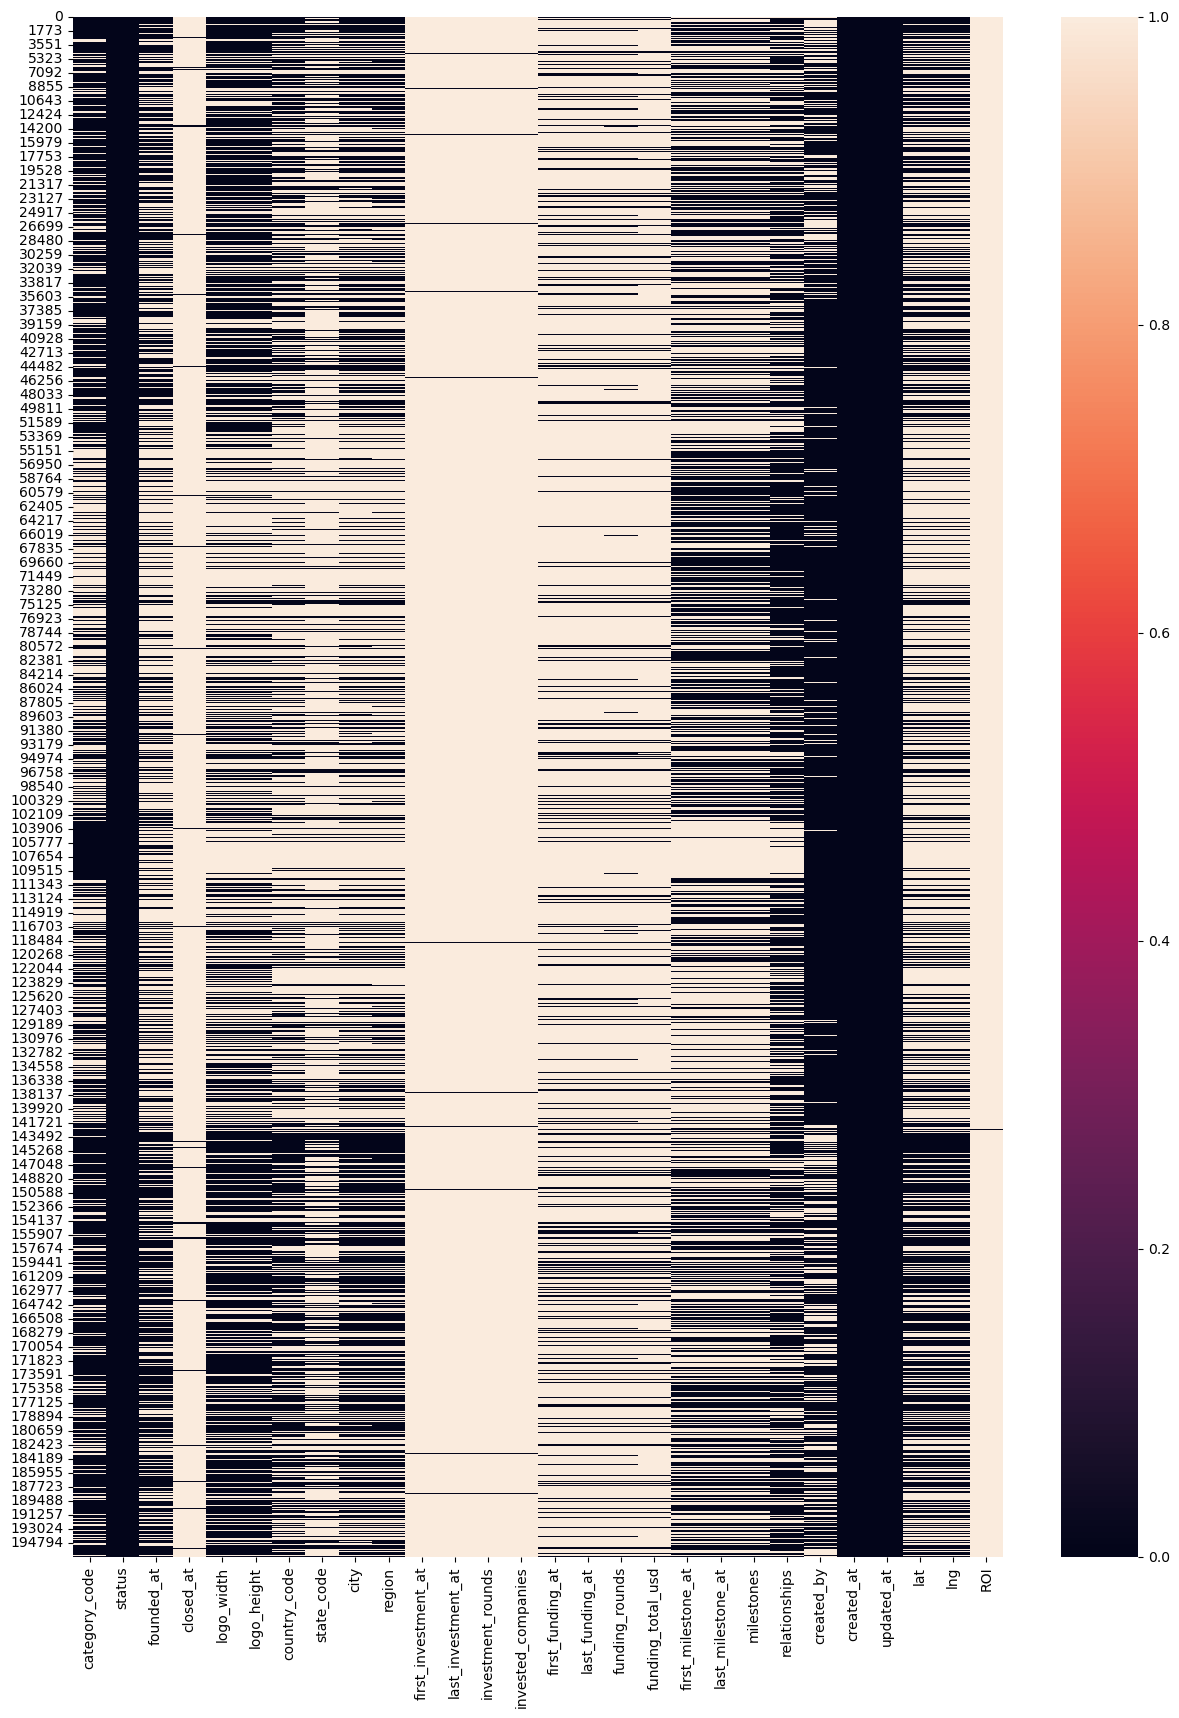

In [18]:
plt.figure(figsize = (15,20))
sns.heatmap(df_drop_dupl.isna())

In [19]:
# Displaying the percentage of nan value in each column of df_drop_dupl
(df_drop_dupl.isna().sum()/df_drop_dupl.shape[0]).sort_values(ascending = False)

ROI                    0.996256
first_investment_at    0.986793
last_investment_at     0.986793
invested_companies     0.986752
investment_rounds      0.986752
closed_at              0.986489
funding_total_usd      0.856260
last_funding_at        0.837525
first_funding_at       0.837525
funding_rounds         0.836494
state_code             0.737504
lng                    0.567593
lat                    0.567593
city                   0.567397
region                 0.552973
country_code           0.546254
founded_at             0.529587
last_milestone_at      0.528520
milestones             0.528520
first_milestone_at     0.528520
logo_width             0.432186
logo_height            0.432186
category_code          0.366792
relationships          0.339441
created_by             0.209696
created_at             0.000000
updated_at             0.000000
status                 0.000000
dtype: float64

In [20]:
# retrieving columns which contain more than 70% nan
missing_val = df_drop_dupl.isna().sum()/df_drop_dupl.shape[0]
cols_to_drop = missing_val[missing_val>0.7].index

In [21]:
cols_to_drop

Index(['closed_at', 'state_code', 'first_investment_at', 'last_investment_at',
       'investment_rounds', 'invested_companies', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd', 'ROI'],
      dtype='object')

In [22]:
# droping columns which contain more than 70% nan
df_miss1 = df_drop_dupl.drop(cols_to_drop, axis = 1)

In [23]:
df_miss1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193919 entries, 0 to 196552
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   category_code       122791 non-null  object 
 1   status              193919 non-null  object 
 2   founded_at          91222 non-null   object 
 3   logo_width          110110 non-null  float64
 4   logo_height         110110 non-null  float64
 5   country_code        87990 non-null   object 
 6   city                83890 non-null   object 
 7   region              86687 non-null   object 
 8   first_milestone_at  91429 non-null   object 
 9   last_milestone_at   91429 non-null   object 
 10  milestones          91429 non-null   float64
 11  relationships       128095 non-null  float64
 12  created_by          153255 non-null  object 
 13  created_at          193919 non-null  object 
 14  updated_at          193919 non-null  object 
 15  lat                 83852 non-null   fl

<Axes: >

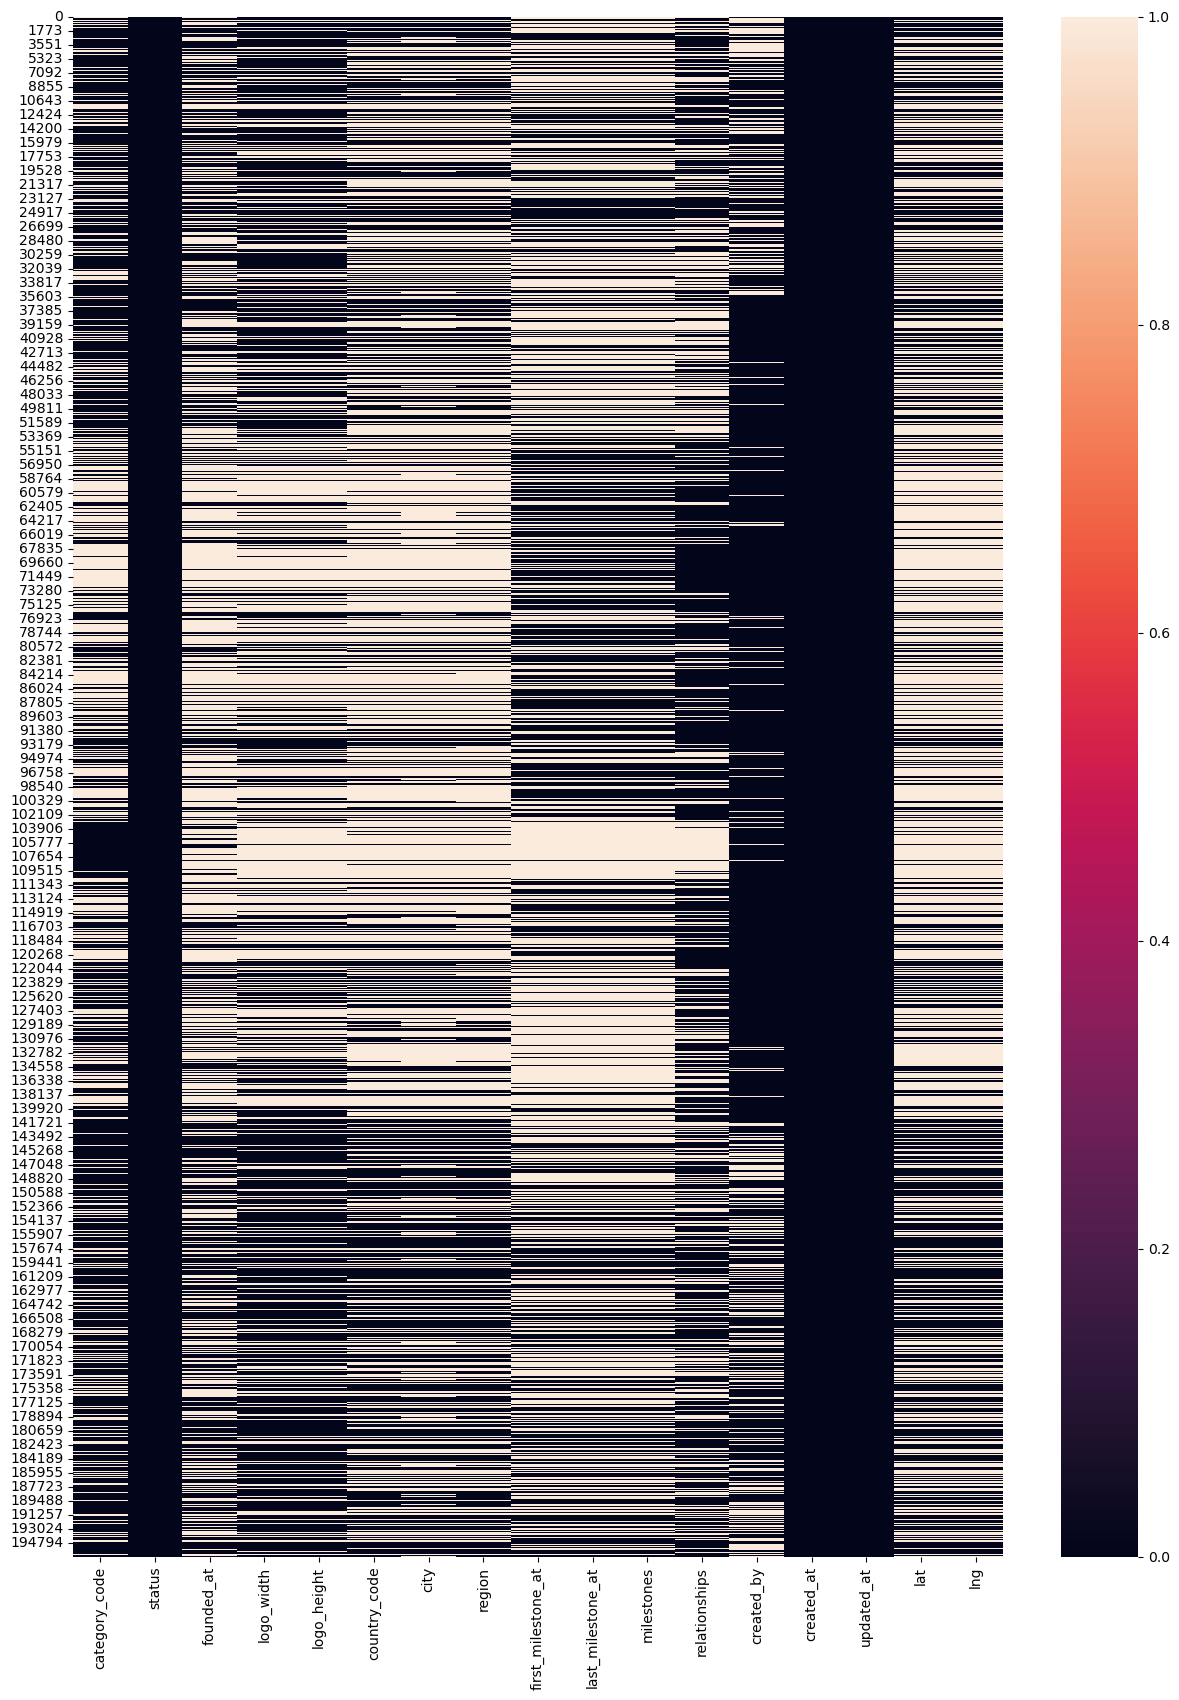

In [24]:
plt.figure(figsize = (15,20))
sns.heatmap(df_miss1.isna())

In [25]:
# Displaying the percentage of nan value in each column of df_miss1
(df_miss1.isna().sum()/df_miss1.shape[0]).sort_values(ascending = False)

lng                   0.567593
lat                   0.567593
city                  0.567397
region                0.552973
country_code          0.546254
founded_at            0.529587
last_milestone_at     0.528520
milestones            0.528520
first_milestone_at    0.528520
logo_height           0.432186
logo_width            0.432186
category_code         0.366792
relationships         0.339441
created_by            0.209696
status                0.000000
created_at            0.000000
updated_at            0.000000
dtype: float64

In [26]:
df_miss1.head(15)

,category_code,status,founded_at,logo_width,logo_height,country_code,city,region,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng
0,web,operating,2005-10-17,401.0,54.0,USA,Seattle,Seattle,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071
1,games_video,acquired,NaN,186.0,85.0,USA,Culver City,Los Angeles,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467
2,games_video,acquired,NaN,107.0,34.0,USA,San Mateo,SF Bay,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN
4,games_video,operating,2008-07-26,200.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN
5,advertising,operating,2007-06-27,284.0,48.0,MAR,Agadir,Agadir,NaN,NaN,NaN,2.0,NaN,2008-08-24 17:39:10,2008-09-06 14:19:19,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,NaN,IND,Vadodara,Vadodara,NaN,NaN,NaN,NaN,NaN,2008-08-24 19:49:25,2010-04-22 23:48:20,22.307159,73.181219
7,NaN,operating,NaN,187.0,53.0,NaN,NaN,NaN,2011-06-20,2011-06-20,1.0,1.0,NaN,2011-09-07 00:53:17,2011-12-20 09:09:53,NaN,NaN
8,advertising,operating,NaN,276.0,47.0,USA,New York,New York,1999-06-01,1999-06-01,1.0,2.0,NaN,2008-08-24 20:21:21,2009-11-19 17:21:00,40.712775,-74.005973
9,enterprise,operating,2011-08-01,200.0,67.0,NaN,NaN,NaN,2011-08-01,2011-08-01,1.0,2.0,dmurtagh,2011-09-07 01:04:56,2011-09-24 13:13:18,NaN,NaN


In [27]:
# Displaying number of NaN in each row of df_miss1
df_miss1.isna().sum(axis = 1).head(20)

0      0
1      4
2      1
3     12
4     10
5      4
6      7
7      8
8      2
9      5
10     7
11    10
12     1
13     0
14     9
15     1
16     9
17     9
18     1
19     4
dtype: int64

In [28]:
# Retrieving indexes of rows which contain more than 8 NaN out of 17 values
miss_row = df_miss1.isna().sum(axis = 1)
rows_ind = miss_row[miss_row>8].index

In [29]:
rows_ind

Index([     3,      4,     11,     14,     16,     17,     21,     27,     29,
           37,
       ...
       196512, 196514, 196521, 196523, 196527, 196529, 196531, 196533, 196534,
       196546],
      dtype='int64', length=95560)

In [30]:
df_miss1.loc[rows_ind,:].head(20)

,category_code,status,founded_at,logo_width,logo_height,country_code,city,region,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN
4,games_video,operating,2008-07-26,200.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN
11,other,operating,2007-03-01,576.0,432.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 21:48:16,2013-04-02 12:36:50,NaN,NaN
14,games_video,operating,2007-12-01,150.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2008-08-24 22:10:04,2013-06-28 20:51:46,NaN,NaN
16,games_video,closed,2008-08-22,223.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2008-08-24 23:07:26,2010-10-01 00:12:22,NaN,NaN
17,consulting,operating,2008-01-01,300.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2008-08-24 23:23:00,2009-04-03 18:00:41,NaN,NaN
21,other,operating,NaN,444.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-25 02:17:08,2009-03-14 14:41:42,NaN,NaN
27,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-25 04:03:25,2008-08-25 16:26:39,NaN,NaN
29,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-09-07 02:43:13,2011-09-24 13:14:04,NaN,NaN
37,mobile,operating,2008-08-08,442.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2008-08-25 05:49:53,2008-09-06 14:19:32,NaN,NaN


In [104]:
# Droping rows which contain more than 8 NaN out of 17 values
df_miss2 = df_miss1.drop(index = rows_ind)

In [105]:
df_miss2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98359 entries, 0 to 196552
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_code       90277 non-null  object 
 1   status              98359 non-null  object 
 2   founded_at          74693 non-null  object 
 3   logo_width          88852 non-null  float64
 4   logo_height         88852 non-null  float64
 5   country_code        87046 non-null  object 
 6   city                83866 non-null  object 
 7   region              85748 non-null  object 
 8   first_milestone_at  53039 non-null  object 
 9   last_milestone_at   53039 non-null  object 
 10  milestones          53039 non-null  float64
 11  relationships       71260 non-null  float64
 12  created_by          72864 non-null  object 
 13  created_at          98359 non-null  object 
 14  updated_at          98359 non-null  object 
 15  lat                 83830 non-null  float64
 16  lng     

In [106]:
# Displaying the percentage of NaN values
(df_miss2.isna().sum()/df_miss2.shape[0]).sort_values(ascending = False)

first_milestone_at    0.460761
last_milestone_at     0.460761
milestones            0.460761
relationships         0.275511
created_by            0.259204
founded_at            0.240608
lat                   0.147714
lng                   0.147714
city                  0.147348
region                0.128214
country_code          0.115017
logo_height           0.096656
logo_width            0.096656
category_code         0.082168
status                0.000000
created_at            0.000000
updated_at            0.000000
dtype: float64

In [107]:
# Droping rows which contain NaN in "category_code" or "lat" or "lng" or "created_by" or "founded_at" or "relationships"
df_miss3 = df_miss2.dropna(subset = ["category_code","lat","lng","created_by","founded_at","relationships"])

In [108]:
df_miss3.shape

(32225, 17)

In [163]:
# Displaying the percentage of NaN values
(df_miss3.isna().sum()/df_miss3.shape[0]).sort_values(ascending = False)

last_milestone_at_Year      0.276276
first_milestone_at          0.276276
milestones                  0.276276
last_milestone_at_Day       0.276276
last_milestone_at_Month     0.276276
last_milestone_at           0.276276
first_milestone_at_Day      0.276276
first_milestone_at_Month    0.276276
first_milestone_at_Year     0.276276
logo_width                  0.080155
logo_height                 0.080155
region                      0.016416
created_at                  0.000000
created_at_Day              0.000000
updated_at                  0.000000
updated_at_Year             0.000000
created_at_Month            0.000000
updated_at_Month            0.000000
updated_at_Day              0.000000
lat                         0.000000
created_at_Year             0.000000
category_code               0.000000
created_by                  0.000000
relationships               0.000000
status                      0.000000
city                        0.000000
country_code                0.000000
f

In [110]:
df_miss3.head(20)

,category_code,status,founded_at,logo_width,logo_height,country_code,city,region,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng
0,web,operating,2005-10-17,401.0,54.0,USA,Seattle,Seattle,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071
13,web,acquired,2007-10-01,200.0,56.0,USA,Mountain View,SF Bay,2008-05-01,2012-09-13,3.0,14.0,initial-importer,2007-10-01 10:17:13,2013-03-13 21:44:15,37.386052,-122.083851
20,cleantech,operating,2003-01-01,150.0,50.0,USA,Austin,Austin,2010-01-01,2010-01-01,1.0,6.0,arun,2011-09-07 02:01:00,2013-04-10 04:35:04,30.267153,-97.743061
24,analytics,operating,2006-01-01,249.0,49.0,USA,San Francisco,SF Bay,2010-05-18,2013-03-01,3.0,19.0,jason,2008-08-25 03:35:42,2013-10-23 11:32:49,37.774929,-122.419415
26,mobile,operating,2003-11-01,2200.0,400.0,AUS,Brisbane,SF Bay,2007-11-01,2007-11-01,1.0,2.0,mwhite41,2011-09-07 02:27:33,2013-10-11 09:51:41,-27.469771,153.025124
34,advertising,operating,2004-09-01,NaN,NaN,AUS,Langhrone Creek,Langhrone Creek,2004-09-01,2004-09-01,1.0,1.0,tonypfitzner,2011-09-07 02:58:41,2011-09-24 13:14:06,-35.296256,139.038277
36,medical,operating,2006-01-01,309.0,61.0,USA,West Bridgewater,West Bridgewater,NaN,NaN,NaN,2.0,timircha,2011-09-07 03:06:47,2011-09-07 03:10:29,42.018989,-71.007822
38,manufacturing,operating,2004-01-01,141.0,68.0,USA,Houston,Houston,NaN,NaN,NaN,4.0,arun,2011-09-07 03:09:59,2013-11-26 05:35:45,29.760427,-95.369803
45,enterprise,operating,2004-01-01,198.0,47.0,USA,Bellevue,Seattle,2010-01-01,2010-01-01,1.0,8.0,arun,2011-09-07 03:32:58,2013-03-31 06:38:49,47.610150,-122.201516
48,web,operating,2006-01-01,146.0,31.0,USA,San Francisco,SF Bay,2010-07-01,2012-05-01,2.0,7.0,initial-importer,2007-10-01 13:09:17,2013-03-14 21:58:54,37.774929,-122.419415


<Axes: >

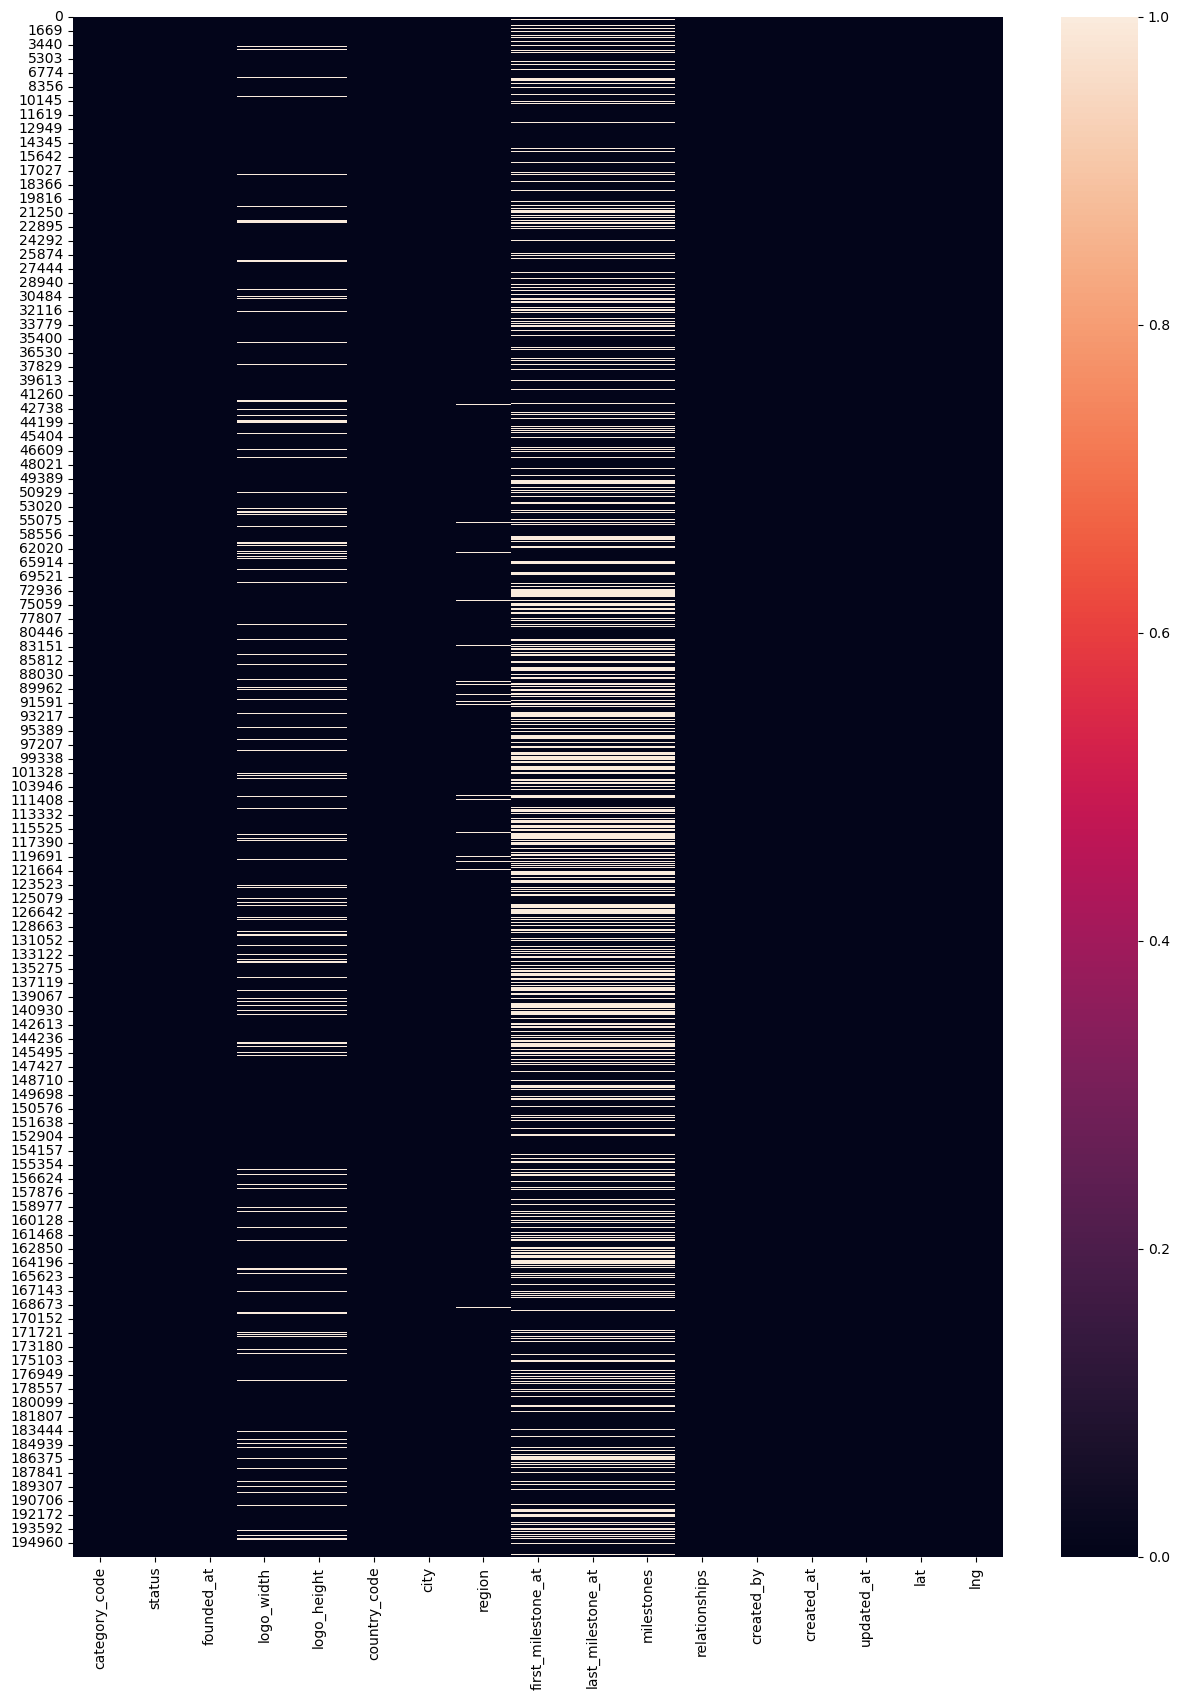

In [111]:
plt.figure(figsize=(15,20))
sns.heatmap(df_miss3.isna())

<Axes: >

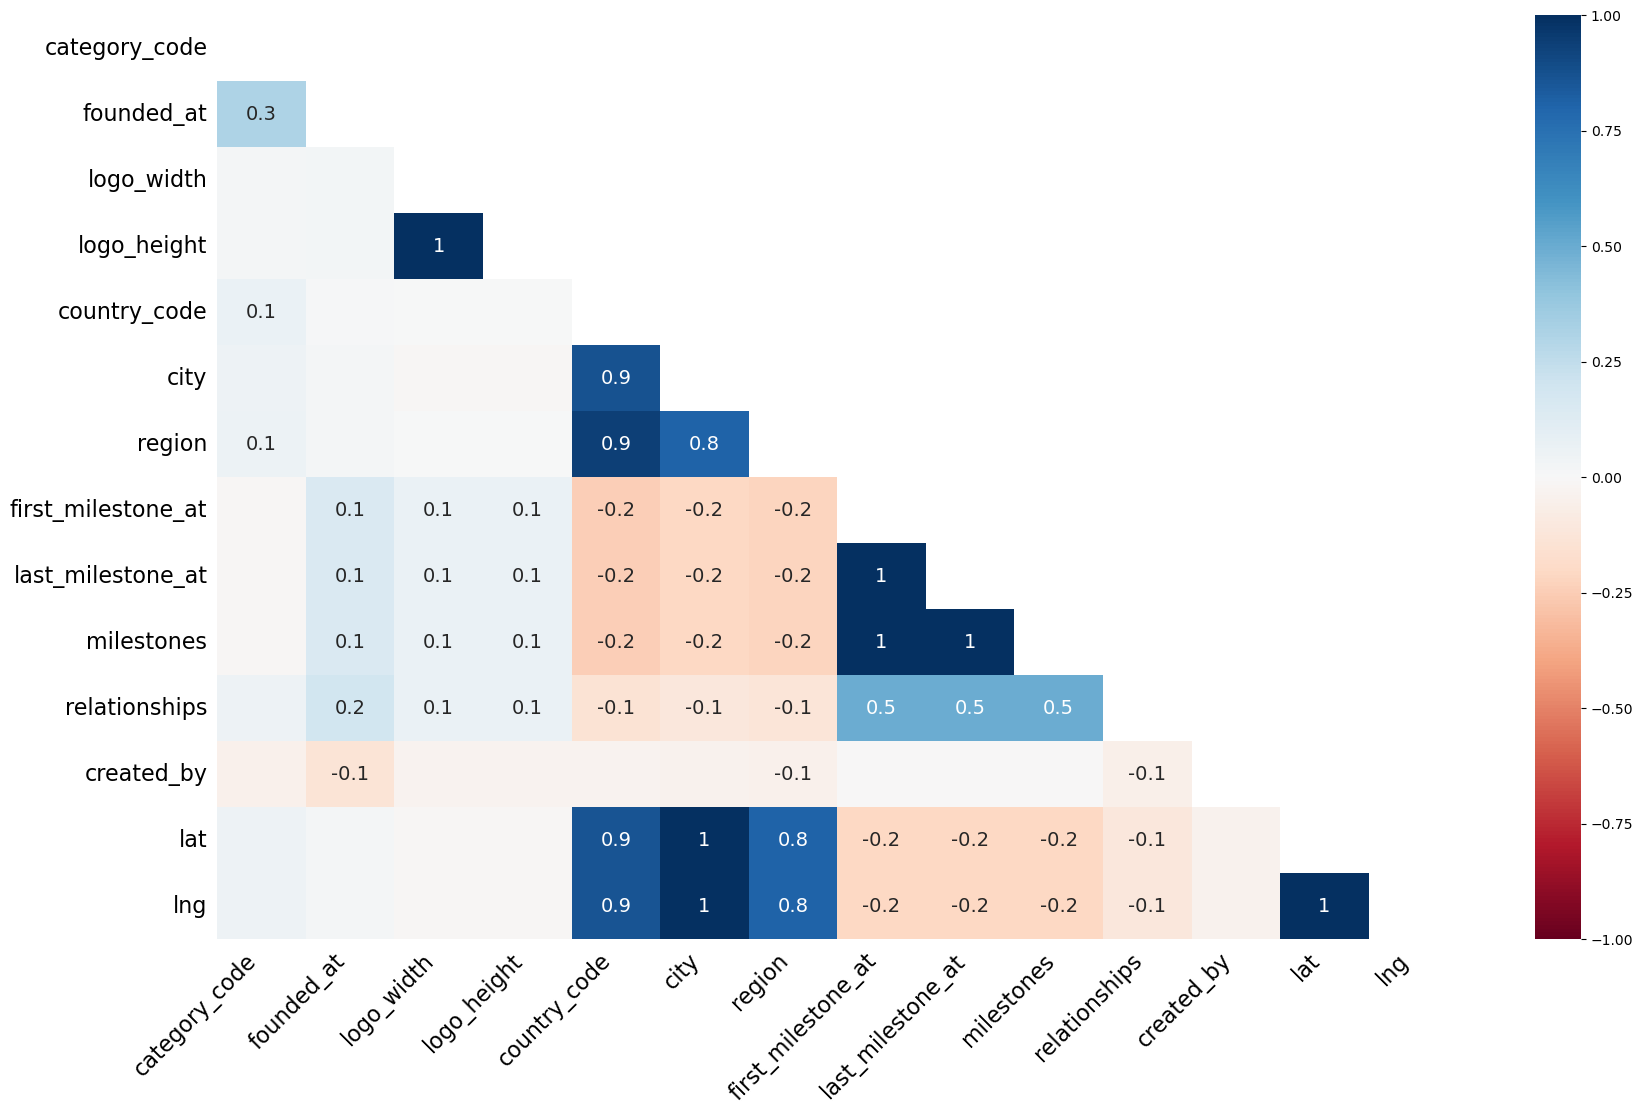

In [112]:
# Displaying the correlation matrix between columns which include NaN values
msno.heatmap(df_miss2)

In [113]:
col_date = ["founded_at","first_milestone_at","last_milestone_at","created_at","updated_at"]

In [114]:
# Converting columns which include date to datetime format
for col in col_date:
    df_miss3[col] = pd.to_datetime(df_miss3[col])

C:\Users\HP\AppData\Local\Temp\ipykernel_12592\932094270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_miss3[col] = pd.to_datetime(df_miss3[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_12592\932094270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_miss3[col] = pd.to_datetime(df_miss3[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_12592\932094270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [115]:
df_miss3.dtypes

category_code                 object
status                        object
founded_at            datetime64[ns]
logo_width                   float64
logo_height                  float64
country_code                  object
city                          object
region                        object
first_milestone_at    datetime64[ns]
last_milestone_at     datetime64[ns]
milestones                   float64
relationships                float64
created_by                    object
created_at            datetime64[ns]
updated_at            datetime64[ns]
lat                          float64
lng                          float64
dtype: object

In [117]:
#Separating each datetime column into Year, Month, and Day and inserting them into `df_miss3`
for col in col_date:
    position = df_miss3.columns.get_loc(col)
    df_miss3.insert(position+1,col+"_Year",df_miss3[col].dt.year)
    df_miss3.insert(position+2,col+"_Month",df_miss3[col].dt.month)
    df_miss3.insert(position+3,col+"_Day",df_miss3[col].dt.day)

In [118]:
df_miss3.head(20)

,category_code,status,founded_at,founded_at_Year,founded_at_Month,founded_at_Day,logo_width,logo_height,country_code,city,region,first_milestone_at,first_milestone_at_Year,first_milestone_at_Month,first_milestone_at_Day,last_milestone_at,last_milestone_at_Year,last_milestone_at_Month,last_milestone_at_Day,milestones,relationships,created_by,created_at,created_at_Year,created_at_Month,created_at_Day,updated_at,updated_at_Year,updated_at_Month,updated_at_Day,lat,lng
0,web,operating,2005-10-17,2005,10,17,401.0,54.0,USA,Seattle,Seattle,2010-09-05,2010.0,9.0,5.0,2013-09-18,2013.0,9.0,18.0,5.0,17.0,initial-importer,2007-05-25 06:51:27,2007,5,25,2013-04-13 03:29:00,2013,4,13,47.606209,-122.332071
13,web,acquired,2007-10-01,2007,10,1,200.0,56.0,USA,Mountain View,SF Bay,2008-05-01,2008.0,5.0,1.0,2012-09-13,2012.0,9.0,13.0,3.0,14.0,initial-importer,2007-10-01 10:17:13,2007,10,1,2013-03-13 21:44:15,2013,3,13,37.386052,-122.083851
20,cleantech,operating,2003-01-01,2003,1,1,150.0,50.0,USA,Austin,Austin,2010-01-01,2010.0,1.0,1.0,2010-01-01,2010.0,1.0,1.0,1.0,6.0,arun,2011-09-07 02:01:00,2011,9,7,2013-04-10 04:35:04,2013,4,10,30.267153,-97.743061
24,analytics,operating,2006-01-01,2006,1,1,249.0,49.0,USA,San Francisco,SF Bay,2010-05-18,2010.0,5.0,18.0,2013-03-01,2013.0,3.0,1.0,3.0,19.0,jason,2008-08-25 03:35:42,2008,8,25,2013-10-23 11:32:49,2013,10,23,37.774929,-122.419415
26,mobile,operating,2003-11-01,2003,11,1,2200.0,400.0,AUS,Brisbane,SF Bay,2007-11-01,2007.0,11.0,1.0,2007-11-01,2007.0,11.0,1.0,1.0,2.0,mwhite41,2011-09-07 02:27:33,2011,9,7,2013-10-11 09:51:41,2013,10,11,-27.469771,153.025124
34,advertising,operating,2004-09-01,2004,9,1,NaN,NaN,AUS,Langhrone Creek,Langhrone Creek,2004-09-01,2004.0,9.0,1.0,2004-09-01,2004.0,9.0,1.0,1.0,1.0,tonypfitzner,2011-09-07 02:58:41,2011,9,7,2011-09-24 13:14:06,2011,9,24,-35.296256,139.038277
36,medical,operating,2006-01-01,2006,1,1,309.0,61.0,USA,West Bridgewater,West Bridgewater,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,2.0,timircha,2011-09-07 03:06:47,2011,9,7,2011-09-07 03:10:29,2011,9,7,42.018989,-71.007822
38,manufacturing,operating,2004-01-01,2004,1,1,141.0,68.0,USA,Houston,Houston,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,4.0,arun,2011-09-07 03:09:59,2011,9,7,2013-11-26 05:35:45,2013,11,26,29.760427,-95.369803
45,enterprise,operating,2004-01-01,2004,1,1,198.0,47.0,USA,Bellevue,Seattle,2010-01-01,2010.0,1.0,1.0,2010-01-01,2010.0,1.0,1.0,1.0,8.0,arun,2011-09-07 03:32:58,2011,9,7,2013-03-31 06:38:49,2013,3,31,47.610150,-122.201516
48,web,operating,2006-01-01,2006,1,1,146.0,31.0,USA,San Francisco,SF Bay,2010-07-01,2010.0,7.0,1.0,2012-05-01,2012.0,5.0,1.0,2.0,7.0,initial-importer,2007-10-01 13:09:17,2007,10,1,2013-03-14 21:58:54,2013,3,14,37.774929,-122.419415


In [119]:
# Droping initial date columns
df_miss4 = df_miss3.drop(col_date, axis = 1)

In [120]:
df_miss4

,category_code,status,founded_at_Year,founded_at_Month,founded_at_Day,logo_width,logo_height,country_code,city,region,first_milestone_at_Year,first_milestone_at_Month,first_milestone_at_Day,last_milestone_at_Year,last_milestone_at_Month,last_milestone_at_Day,milestones,relationships,created_by,created_at_Year,created_at_Month,created_at_Day,updated_at_Year,updated_at_Month,updated_at_Day,lat,lng
0,web,operating,2005,10,17,401.0,54.0,USA,Seattle,Seattle,2010.0,9.0,5.0,2013.0,9.0,18.0,5.0,17.0,initial-importer,2007,5,25,2013,4,13,47.606209,-122.332071
13,web,acquired,2007,10,1,200.0,56.0,USA,Mountain View,SF Bay,2008.0,5.0,1.0,2012.0,9.0,13.0,3.0,14.0,initial-importer,2007,10,1,2013,3,13,37.386052,-122.083851
20,cleantech,operating,2003,1,1,150.0,50.0,USA,Austin,Austin,2010.0,1.0,1.0,2010.0,1.0,1.0,1.0,6.0,arun,2011,9,7,2013,4,10,30.267153,-97.743061
24,analytics,operating,2006,1,1,249.0,49.0,USA,San Francisco,SF Bay,2010.0,5.0,18.0,2013.0,3.0,1.0,3.0,19.0,jason,2008,8,25,2013,10,23,37.774929,-122.419415
26,mobile,operating,2003,11,1,2200.0,400.0,AUS,Brisbane,SF Bay,2007.0,11.0,1.0,2007.0,11.0,1.0,1.0,2.0,mwhite41,2011,9,7,2013,10,11,-27.469771,153.025124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196497,web,operating,2006,11,1,140.0,56.0,IND,Jalandhar City,Jalandhar City,2006.0,10.0,1.0,2006.0,10.0,1.0,1.0,4.0,initial-importer,2007,9,27,2013,3,25,31.326015,75.576183
196510,web,operating,2011,3,1,300.0,167.0,USA,San Jose,SF Bay,2010.0,4.0,1.0,2010.0,4.0,1.0,1.0,2.0,1dollarscan,2011,9,6,2012,8,23,37.338208,-121.886329
196519,enterprise,acquired,2003,1,1,300.0,94.0,USA,Palo Alto,SF Bay,2006.0,11.0,1.0,2010.0,11.0,22.0,3.0,19.0,initial-importer,2007,9,27,2013,3,29,37.441883,-122.143019
196524,public_relations,acquired,2005,11,1,322.0,52.0,USA,Lancaster,Dallas,2005.0,11.0,6.0,2005.0,11.0,6.0,1.0,4.0,hypercube,2011,9,6,2011,9,24,40.037875,-76.305514


In [121]:
df_miss4.nunique()

category_code                  42
status                          4
founded_at_Year               112
founded_at_Month               12
founded_at_Day                 31
logo_width                   2407
logo_height                  1528
country_code                  128
city                         5033
region                       2710
first_milestone_at_Year        46
first_milestone_at_Month       12
first_milestone_at_Day         31
last_milestone_at_Year         46
last_milestone_at_Month        12
last_milestone_at_Day          31
milestones                      9
relationships                 123
created_by                  18010
created_at_Year                 7
created_at_Month               12
created_at_Day                 31
updated_at_Year                 6
updated_at_Month               12
updated_at_Day                 31
lat                          4061
lng                          4059
dtype: int64

<Axes: >

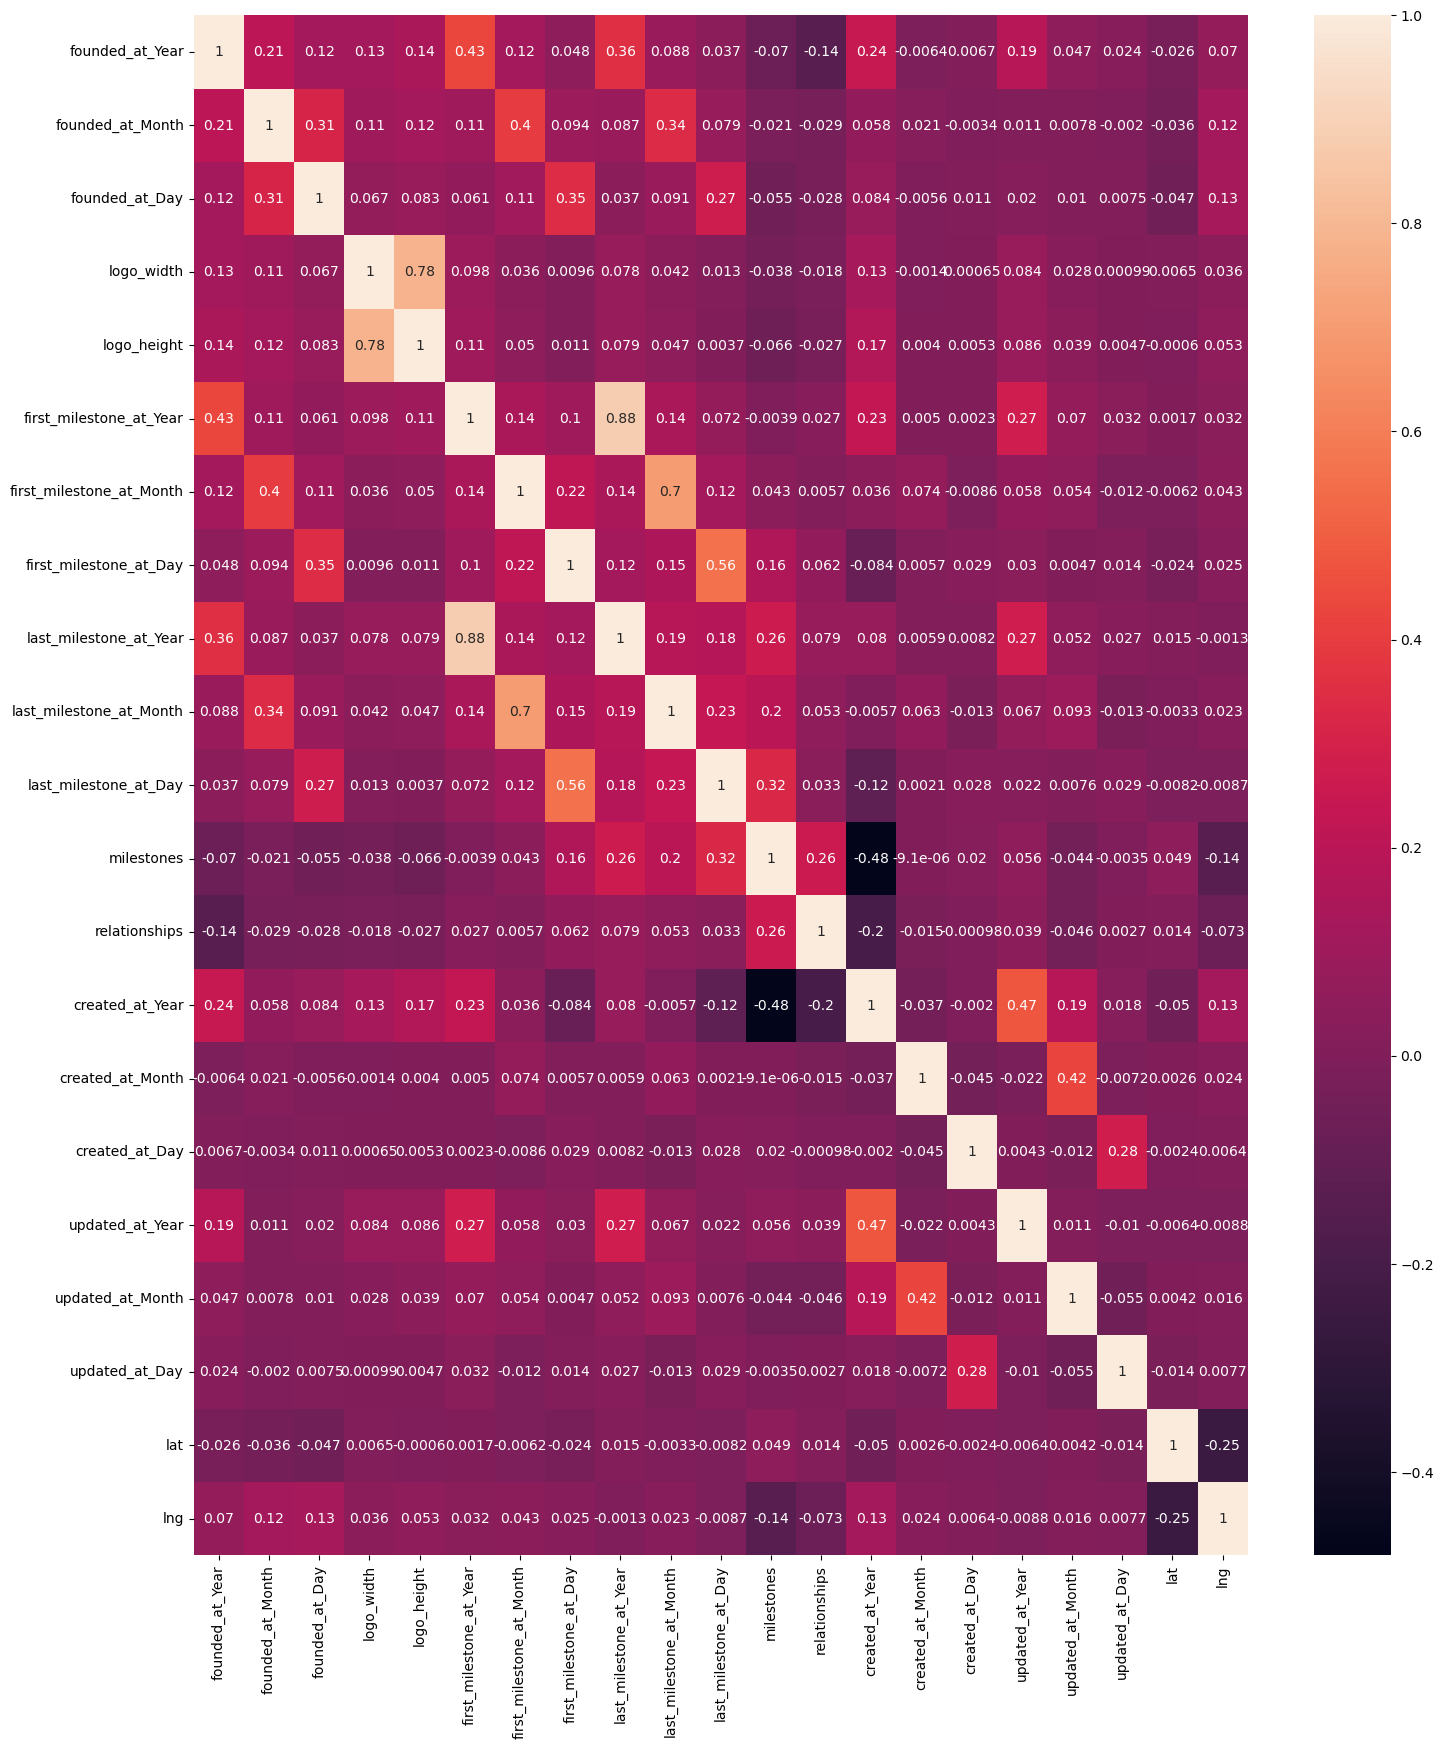

In [122]:
# Displaying a correlation matrix between numerical feature
plt.figure(figsize = (17,20))
sns.heatmap(df_miss4[df_miss4.select_dtypes('number').columns].corr(numeric_only = False), annot = True)

In [123]:
# Selecting numerical feature for imputing
num_feat = df_miss4.select_dtypes('number').columns

In [124]:
num_feat

Index(['founded_at_Year', 'founded_at_Month', 'founded_at_Day', 'logo_width',
       'logo_height', 'first_milestone_at_Year', 'first_milestone_at_Month',
       'first_milestone_at_Day', 'last_milestone_at_Year',
       'last_milestone_at_Month', 'last_milestone_at_Day', 'milestones',
       'relationships', 'created_at_Year', 'created_at_Month',
       'created_at_Day', 'updated_at_Year', 'updated_at_Month',
       'updated_at_Day', 'lat', 'lng'],
      dtype='object')

In [125]:
Imput_knn = KNNImputer(n_neighbors = 3).set_output(transform = "pandas")

In [128]:
# Imputing missing values with KNNImputer
feat_imput_knn = Imput_knn.fit_transform(df_miss4[num_feat])

In [129]:
feat_imput_knn.head(20)

,founded_at_Year,founded_at_Month,founded_at_Day,logo_width,logo_height,first_milestone_at_Year,first_milestone_at_Month,first_milestone_at_Day,last_milestone_at_Year,last_milestone_at_Month,last_milestone_at_Day,milestones,relationships,created_at_Year,created_at_Month,created_at_Day,updated_at_Year,updated_at_Month,updated_at_Day,lat,lng
0,2005.0,10.0,17.0,401.000000,54.000000,2010.000000,9.000000,5.000000,2013.000000,9.000000,18.000000,5.000000,17.0,2007.0,5.0,25.0,2013.0,4.0,13.0,47.606209,-122.332071
13,2007.0,10.0,1.0,200.000000,56.000000,2008.000000,5.000000,1.000000,2012.000000,9.000000,13.000000,3.000000,14.0,2007.0,10.0,1.0,2013.0,3.0,13.0,37.386052,-122.083851
20,2003.0,1.0,1.0,150.000000,50.000000,2010.000000,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,6.0,2011.0,9.0,7.0,2013.0,4.0,10.0,30.267153,-97.743061
24,2006.0,1.0,1.0,249.000000,49.000000,2010.000000,5.000000,18.000000,2013.000000,3.000000,1.000000,3.000000,19.0,2008.0,8.0,25.0,2013.0,10.0,23.0,37.774929,-122.419415
26,2003.0,11.0,1.0,2200.000000,400.000000,2007.000000,11.000000,1.000000,2007.000000,11.000000,1.000000,1.000000,2.0,2011.0,9.0,7.0,2013.0,10.0,11.0,-27.469771,153.025124
34,2004.0,9.0,1.0,646.333333,475.333333,2004.000000,9.000000,1.000000,2004.000000,9.000000,1.000000,1.000000,1.0,2011.0,9.0,7.0,2011.0,9.0,24.0,-35.296256,139.038277
36,2006.0,1.0,1.0,309.000000,61.000000,2010.666667,5.333333,14.000000,2010.666667,5.333333,14.000000,1.000000,2.0,2011.0,9.0,7.0,2011.0,9.0,7.0,42.018989,-71.007822
38,2004.0,1.0,1.0,141.000000,68.000000,2008.333333,4.000000,10.666667,2009.333333,6.666667,13.666667,1.333333,4.0,2011.0,9.0,7.0,2013.0,11.0,26.0,29.760427,-95.369803
45,2004.0,1.0,1.0,198.000000,47.000000,2010.000000,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,8.0,2011.0,9.0,7.0,2013.0,3.0,31.0,47.610150,-122.201516
48,2006.0,1.0,1.0,146.000000,31.000000,2010.000000,7.000000,1.000000,2012.000000,5.000000,1.000000,2.000000,7.0,2007.0,10.0,1.0,2013.0,3.0,14.0,37.774929,-122.419415


In [130]:
df_miss4[num_feat].head(20)

,founded_at_Year,founded_at_Month,founded_at_Day,logo_width,logo_height,first_milestone_at_Year,first_milestone_at_Month,first_milestone_at_Day,last_milestone_at_Year,last_milestone_at_Month,last_milestone_at_Day,milestones,relationships,created_at_Year,created_at_Month,created_at_Day,updated_at_Year,updated_at_Month,updated_at_Day,lat,lng
0,2005,10,17,401.0,54.0,2010.0,9.0,5.0,2013.0,9.0,18.0,5.0,17.0,2007,5,25,2013,4,13,47.606209,-122.332071
13,2007,10,1,200.0,56.0,2008.0,5.0,1.0,2012.0,9.0,13.0,3.0,14.0,2007,10,1,2013,3,13,37.386052,-122.083851
20,2003,1,1,150.0,50.0,2010.0,1.0,1.0,2010.0,1.0,1.0,1.0,6.0,2011,9,7,2013,4,10,30.267153,-97.743061
24,2006,1,1,249.0,49.0,2010.0,5.0,18.0,2013.0,3.0,1.0,3.0,19.0,2008,8,25,2013,10,23,37.774929,-122.419415
26,2003,11,1,2200.0,400.0,2007.0,11.0,1.0,2007.0,11.0,1.0,1.0,2.0,2011,9,7,2013,10,11,-27.469771,153.025124
34,2004,9,1,NaN,NaN,2004.0,9.0,1.0,2004.0,9.0,1.0,1.0,1.0,2011,9,7,2011,9,24,-35.296256,139.038277
36,2006,1,1,309.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2011,9,7,2011,9,7,42.018989,-71.007822
38,2004,1,1,141.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2011,9,7,2013,11,26,29.760427,-95.369803
45,2004,1,1,198.0,47.0,2010.0,1.0,1.0,2010.0,1.0,1.0,1.0,8.0,2011,9,7,2013,3,31,47.610150,-122.201516
48,2006,1,1,146.0,31.0,2010.0,7.0,1.0,2012.0,5.0,1.0,2.0,7.0,2007,10,1,2013,3,14,37.774929,-122.419415


In [131]:
feat_imput_knn.isna().sum()

founded_at_Year             0
founded_at_Month            0
founded_at_Day              0
logo_width                  0
logo_height                 0
first_milestone_at_Year     0
first_milestone_at_Month    0
first_milestone_at_Day      0
last_milestone_at_Year      0
last_milestone_at_Month     0
last_milestone_at_Day       0
milestones                  0
relationships               0
created_at_Year             0
created_at_Month            0
created_at_Day              0
updated_at_Year             0
updated_at_Month            0
updated_at_Day              0
lat                         0
lng                         0
dtype: int64

In [132]:
#Droping former numerical features
df_miss5 = df_miss4.drop(num_feat, axis = 1)

In [133]:
df_miss5.head(5)

,category_code,status,country_code,city,region,created_by
0,web,operating,USA,Seattle,Seattle,initial-importer
13,web,acquired,USA,Mountain View,SF Bay,initial-importer
20,cleantech,operating,USA,Austin,Austin,arun
24,analytics,operating,USA,San Francisco,SF Bay,jason
26,mobile,operating,AUS,Brisbane,SF Bay,mwhite41


In [134]:
# concatenating new numerical features with none missing values
df_miss5 = pd.concat([df_miss5,feat_imput_knn], axis = 1, ignore_index = False)

In [135]:
df_miss5.head(20)

,category_code,status,country_code,city,region,created_by,founded_at_Year,founded_at_Month,founded_at_Day,logo_width,logo_height,first_milestone_at_Year,first_milestone_at_Month,first_milestone_at_Day,last_milestone_at_Year,last_milestone_at_Month,last_milestone_at_Day,milestones,relationships,created_at_Year,created_at_Month,created_at_Day,updated_at_Year,updated_at_Month,updated_at_Day,lat,lng
0,web,operating,USA,Seattle,Seattle,initial-importer,2005.0,10.0,17.0,401.000000,54.000000,2010.000000,9.000000,5.000000,2013.000000,9.000000,18.000000,5.000000,17.0,2007.0,5.0,25.0,2013.0,4.0,13.0,47.606209,-122.332071
13,web,acquired,USA,Mountain View,SF Bay,initial-importer,2007.0,10.0,1.0,200.000000,56.000000,2008.000000,5.000000,1.000000,2012.000000,9.000000,13.000000,3.000000,14.0,2007.0,10.0,1.0,2013.0,3.0,13.0,37.386052,-122.083851
20,cleantech,operating,USA,Austin,Austin,arun,2003.0,1.0,1.0,150.000000,50.000000,2010.000000,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,6.0,2011.0,9.0,7.0,2013.0,4.0,10.0,30.267153,-97.743061
24,analytics,operating,USA,San Francisco,SF Bay,jason,2006.0,1.0,1.0,249.000000,49.000000,2010.000000,5.000000,18.000000,2013.000000,3.000000,1.000000,3.000000,19.0,2008.0,8.0,25.0,2013.0,10.0,23.0,37.774929,-122.419415
26,mobile,operating,AUS,Brisbane,SF Bay,mwhite41,2003.0,11.0,1.0,2200.000000,400.000000,2007.000000,11.000000,1.000000,2007.000000,11.000000,1.000000,1.000000,2.0,2011.0,9.0,7.0,2013.0,10.0,11.0,-27.469771,153.025124
34,advertising,operating,AUS,Langhrone Creek,Langhrone Creek,tonypfitzner,2004.0,9.0,1.0,646.333333,475.333333,2004.000000,9.000000,1.000000,2004.000000,9.000000,1.000000,1.000000,1.0,2011.0,9.0,7.0,2011.0,9.0,24.0,-35.296256,139.038277
36,medical,operating,USA,West Bridgewater,West Bridgewater,timircha,2006.0,1.0,1.0,309.000000,61.000000,2010.666667,5.333333,14.000000,2010.666667,5.333333,14.000000,1.000000,2.0,2011.0,9.0,7.0,2011.0,9.0,7.0,42.018989,-71.007822
38,manufacturing,operating,USA,Houston,Houston,arun,2004.0,1.0,1.0,141.000000,68.000000,2008.333333,4.000000,10.666667,2009.333333,6.666667,13.666667,1.333333,4.0,2011.0,9.0,7.0,2013.0,11.0,26.0,29.760427,-95.369803
45,enterprise,operating,USA,Bellevue,Seattle,arun,2004.0,1.0,1.0,198.000000,47.000000,2010.000000,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,8.0,2011.0,9.0,7.0,2013.0,3.0,31.0,47.610150,-122.201516
48,web,operating,USA,San Francisco,SF Bay,initial-importer,2006.0,1.0,1.0,146.000000,31.000000,2010.000000,7.000000,1.000000,2012.000000,5.000000,1.000000,2.000000,7.0,2007.0,10.0,1.0,2013.0,3.0,14.0,37.774929,-122.419415


In [136]:
df_miss5.dtypes

category_code                object
status                       object
country_code                 object
city                         object
region                       object
created_by                   object
founded_at_Year             float64
founded_at_Month            float64
founded_at_Day              float64
logo_width                  float64
logo_height                 float64
first_milestone_at_Year     float64
first_milestone_at_Month    float64
first_milestone_at_Day      float64
last_milestone_at_Year      float64
last_milestone_at_Month     float64
last_milestone_at_Day       float64
milestones                  float64
relationships               float64
created_at_Year             float64
created_at_Month            float64
created_at_Day              float64
updated_at_Year             float64
updated_at_Month            float64
updated_at_Day              float64
lat                         float64
lng                         float64
dtype: object

In [137]:
df_miss5[["founded_at_Year","founded_at_Month","founded_at_Day","logo_width","logo_height","first_milestone_at_Year","first_milestone_at_Month","first_milestone_at_Day","last_milestone_at_Year","last_milestone_at_Month","last_milestone_at_Day","milestones","relationships","created_at_Year","created_at_Month","created_at_Day","updated_at_Year","updated_at_Month","updated_at_Day"]] = df_miss5[["founded_at_Year","founded_at_Month","founded_at_Day","logo_width","logo_height","first_milestone_at_Year","first_milestone_at_Month","first_milestone_at_Day","last_milestone_at_Year","last_milestone_at_Month","last_milestone_at_Day","milestones","relationships","created_at_Year","created_at_Month","created_at_Day","updated_at_Year","updated_at_Month","updated_at_Day"]].round()

In [138]:
df_miss5.head(20)

,category_code,status,country_code,city,region,created_by,founded_at_Year,founded_at_Month,founded_at_Day,logo_width,logo_height,first_milestone_at_Year,first_milestone_at_Month,first_milestone_at_Day,last_milestone_at_Year,last_milestone_at_Month,last_milestone_at_Day,milestones,relationships,created_at_Year,created_at_Month,created_at_Day,updated_at_Year,updated_at_Month,updated_at_Day,lat,lng
0,web,operating,USA,Seattle,Seattle,initial-importer,2005.0,10.0,17.0,401.0,54.0,2010.0,9.0,5.0,2013.0,9.0,18.0,5.0,17.0,2007.0,5.0,25.0,2013.0,4.0,13.0,47.606209,-122.332071
13,web,acquired,USA,Mountain View,SF Bay,initial-importer,2007.0,10.0,1.0,200.0,56.0,2008.0,5.0,1.0,2012.0,9.0,13.0,3.0,14.0,2007.0,10.0,1.0,2013.0,3.0,13.0,37.386052,-122.083851
20,cleantech,operating,USA,Austin,Austin,arun,2003.0,1.0,1.0,150.0,50.0,2010.0,1.0,1.0,2010.0,1.0,1.0,1.0,6.0,2011.0,9.0,7.0,2013.0,4.0,10.0,30.267153,-97.743061
24,analytics,operating,USA,San Francisco,SF Bay,jason,2006.0,1.0,1.0,249.0,49.0,2010.0,5.0,18.0,2013.0,3.0,1.0,3.0,19.0,2008.0,8.0,25.0,2013.0,10.0,23.0,37.774929,-122.419415
26,mobile,operating,AUS,Brisbane,SF Bay,mwhite41,2003.0,11.0,1.0,2200.0,400.0,2007.0,11.0,1.0,2007.0,11.0,1.0,1.0,2.0,2011.0,9.0,7.0,2013.0,10.0,11.0,-27.469771,153.025124
34,advertising,operating,AUS,Langhrone Creek,Langhrone Creek,tonypfitzner,2004.0,9.0,1.0,646.0,475.0,2004.0,9.0,1.0,2004.0,9.0,1.0,1.0,1.0,2011.0,9.0,7.0,2011.0,9.0,24.0,-35.296256,139.038277
36,medical,operating,USA,West Bridgewater,West Bridgewater,timircha,2006.0,1.0,1.0,309.0,61.0,2011.0,5.0,14.0,2011.0,5.0,14.0,1.0,2.0,2011.0,9.0,7.0,2011.0,9.0,7.0,42.018989,-71.007822
38,manufacturing,operating,USA,Houston,Houston,arun,2004.0,1.0,1.0,141.0,68.0,2008.0,4.0,11.0,2009.0,7.0,14.0,1.0,4.0,2011.0,9.0,7.0,2013.0,11.0,26.0,29.760427,-95.369803
45,enterprise,operating,USA,Bellevue,Seattle,arun,2004.0,1.0,1.0,198.0,47.0,2010.0,1.0,1.0,2010.0,1.0,1.0,1.0,8.0,2011.0,9.0,7.0,2013.0,3.0,31.0,47.610150,-122.201516
48,web,operating,USA,San Francisco,SF Bay,initial-importer,2006.0,1.0,1.0,146.0,31.0,2010.0,7.0,1.0,2012.0,5.0,1.0,2.0,7.0,2007.0,10.0,1.0,2013.0,3.0,14.0,37.774929,-122.419415


In [139]:
#Now I will replace existing values and missing values in country_code, city and region using lat and lng
geolocator = Nominatim(user_agent="your_app_name")
#Defining the function
def reverse_geocode(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True, timeout=10)
        address = location.raw['address']
        country = address.get('country_code', None)
        city = address.get('city', address.get('town', address.get('village', None)))
        region = address.get('state', None)
        return country, city, region
    except:
        return None, None, None

In [140]:
reverse_geocode(30.427755,-9.598107)

('ma', 'Agadir ⴰⴳⴰⴷⵉⵔ أگادير', None)

In [141]:
reverse_geocode(40.712775,-74.005973)

('us', 'City of New York', 'New York')

In [142]:
reverse_geocode(-27.469771,153.025124)

('au', None, 'Queensland')

In [143]:
reverse_geocode(37.386052,-122.083851)

('us', 'Mountain View', 'California')

In [144]:
reverse_geocode(34.021122,-118.396467)

('us', 'Culver City', 'California')

In [146]:
#Using defined function to impute
for i, row in tqdm(df_miss5.iterrows(), total=df_miss5.shape[0]):
        country, city, region = reverse_geocode(row['lat'], row['lng'])
        df_miss5.at[i, 'country_code'] = country
        df_miss5.at[i, 'city'] = city
        df_miss5.at[i, 'region'] = region
        time.sleep(1)  # To avoid overloading the geocoding service

  0%|          | 0/32225 [00:00<?, ?it/s]

In [147]:
df_miss5.head(15)

,category_code,status,country_code,city,region,created_by,founded_at_Year,founded_at_Month,founded_at_Day,logo_width,logo_height,first_milestone_at_Year,first_milestone_at_Month,first_milestone_at_Day,last_milestone_at_Year,last_milestone_at_Month,last_milestone_at_Day,milestones,relationships,created_at_Year,created_at_Month,created_at_Day,updated_at_Year,updated_at_Month,updated_at_Day,lat,lng
0,web,operating,us,Seattle,Washington,initial-importer,2005.0,10.0,17.0,401.0,54.0,2010.0,9.0,5.0,2013.0,9.0,18.0,5.0,17.0,2007.0,5.0,25.0,2013.0,4.0,13.0,47.606209,-122.332071
13,web,acquired,us,Mountain View,California,initial-importer,2007.0,10.0,1.0,200.0,56.0,2008.0,5.0,1.0,2012.0,9.0,13.0,3.0,14.0,2007.0,10.0,1.0,2013.0,3.0,13.0,37.386052,-122.083851
20,cleantech,operating,us,Austin,Texas,arun,2003.0,1.0,1.0,150.0,50.0,2010.0,1.0,1.0,2010.0,1.0,1.0,1.0,6.0,2011.0,9.0,7.0,2013.0,4.0,10.0,30.267153,-97.743061
24,analytics,operating,us,San Francisco,California,jason,2006.0,1.0,1.0,249.0,49.0,2010.0,5.0,18.0,2013.0,3.0,1.0,3.0,19.0,2008.0,8.0,25.0,2013.0,10.0,23.0,37.774929,-122.419415
26,mobile,operating,au,None,Queensland,mwhite41,2003.0,11.0,1.0,2200.0,400.0,2007.0,11.0,1.0,2007.0,11.0,1.0,1.0,2.0,2011.0,9.0,7.0,2013.0,10.0,11.0,-27.469771,153.025124
34,advertising,operating,au,Langhorne Creek,South Australia,tonypfitzner,2004.0,9.0,1.0,646.0,475.0,2004.0,9.0,1.0,2004.0,9.0,1.0,1.0,1.0,2011.0,9.0,7.0,2011.0,9.0,24.0,-35.296256,139.038277
36,medical,operating,us,West Bridgewater,Massachusetts,timircha,2006.0,1.0,1.0,309.0,61.0,2011.0,5.0,14.0,2011.0,5.0,14.0,1.0,2.0,2011.0,9.0,7.0,2011.0,9.0,7.0,42.018989,-71.007822
38,manufacturing,operating,us,Houston,Texas,arun,2004.0,1.0,1.0,141.0,68.0,2008.0,4.0,11.0,2009.0,7.0,14.0,1.0,4.0,2011.0,9.0,7.0,2013.0,11.0,26.0,29.760427,-95.369803
45,enterprise,operating,us,Bellevue,Washington,arun,2004.0,1.0,1.0,198.0,47.0,2010.0,1.0,1.0,2010.0,1.0,1.0,1.0,8.0,2011.0,9.0,7.0,2013.0,3.0,31.0,47.610150,-122.201516
48,web,operating,us,San Francisco,California,initial-importer,2006.0,1.0,1.0,146.0,31.0,2010.0,7.0,1.0,2012.0,5.0,1.0,2.0,7.0,2007.0,10.0,1.0,2013.0,3.0,14.0,37.774929,-122.419415


In [149]:
(df_miss5.isna().sum()/df_miss5.shape[0]).sort_values(ascending = False)

region                      0.078852
city                        0.026563
country_code                0.004531
category_code               0.000000
last_milestone_at_Month     0.000000
lat                         0.000000
updated_at_Day              0.000000
updated_at_Month            0.000000
updated_at_Year             0.000000
created_at_Day              0.000000
created_at_Month            0.000000
created_at_Year             0.000000
relationships               0.000000
milestones                  0.000000
last_milestone_at_Day       0.000000
first_milestone_at_Day      0.000000
last_milestone_at_Year      0.000000
status                      0.000000
first_milestone_at_Month    0.000000
first_milestone_at_Year     0.000000
logo_height                 0.000000
logo_width                  0.000000
founded_at_Day              0.000000
founded_at_Month            0.000000
founded_at_Year             0.000000
created_by                  0.000000
lng                         0.000000
d

<Axes: >

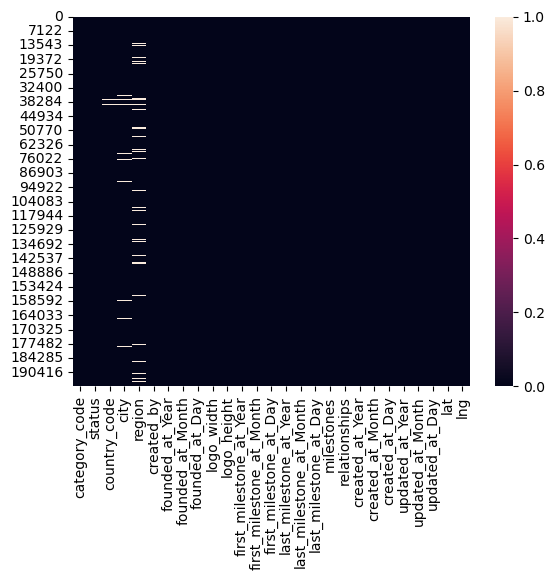

In [155]:
sns.heatmap(df_miss5.isna())

In [152]:
row_index_nan = df_miss5[df_miss5[["country_code","city","region"]].isna().any(axis=1)].index

In [153]:
row_index_nan

Index([    26,     87,    125,    193,    245,    248,    289,    388,    496,
          605,
       ...
       196034, 196130, 196139, 196141, 196149, 196173, 196255, 196347, 196379,
       196409],
      dtype='int64', length=3221)

In [154]:
df_miss5.loc[row_index_nan,:].head(20)

,category_code,status,country_code,city,region,created_by,founded_at_Year,founded_at_Month,founded_at_Day,logo_width,logo_height,first_milestone_at_Year,first_milestone_at_Month,first_milestone_at_Day,last_milestone_at_Year,last_milestone_at_Month,last_milestone_at_Day,milestones,relationships,created_at_Year,created_at_Month,created_at_Day,updated_at_Year,updated_at_Month,updated_at_Day,lat,lng
26,mobile,operating,au,None,Queensland,mwhite41,2003.0,11.0,1.0,2200.0,400.0,2007.0,11.0,1.0,2007.0,11.0,1.0,1.0,2.0,2011.0,9.0,7.0,2013.0,10.0,11.0,-27.469771,153.025124
87,other,operating,ie,Cork,None,cameronc,2008.0,10.0,30.0,363.0,68.0,2008.0,5.0,2.0,2008.0,5.0,2.0,1.0,5.0,2008.0,8.0,25.0,2012.0,12.0,5.0,51.896892,-8.486316
125,news,operating,se,Stockholms kommun,None,paulr,2004.0,4.0,1.0,236.0,79.0,2004.0,6.0,1.0,2004.0,6.0,1.0,1.0,2.0,2011.0,9.0,7.0,2011.0,9.0,24.0,59.329324,18.068581
193,ecommerce,acquired,sg,Singapore,None,halffinn,2011.0,7.0,4.0,250.0,250.0,2011.0,9.0,1.0,2011.0,9.0,1.0,1.0,2.0,2011.0,9.0,8.0,2012.0,7.0,27.0,1.352083,103.819836
245,software,operating,kr,서울특별시,None,facebookuser660251844,2009.0,9.0,28.0,250.0,250.0,2013.0,3.0,1.0,2013.0,3.0,1.0,1.0,5.0,2011.0,9.0,8.0,2013.0,9.0,24.0,37.566535,126.977969
248,advertising,operating,tr,İstanbul,None,oguzkaganaslan,2011.0,7.0,26.0,1884.0,656.0,2011.0,7.0,26.0,2011.0,7.0,26.0,1.0,1.0,2011.0,9.0,8.0,2011.0,11.0,4.0,41.008238,28.978359
289,web,operating,us,None,Colorado,facebookuser811030390,2011.0,8.0,1.0,500.0,300.0,2011.0,8.0,1.0,2011.0,8.0,1.0,1.0,3.0,2011.0,9.0,8.0,2012.0,8.0,16.0,39.576406,-106.723464
388,web,operating,sg,Singapore,None,syking,2011.0,5.0,20.0,308.0,255.0,2011.0,5.0,20.0,2011.0,5.0,20.0,1.0,2.0,2011.0,9.0,9.0,2011.0,11.0,9.0,1.352083,103.819836
496,consulting,operating,us,None,West Virginia,facebookuser504412918,2008.0,7.0,1.0,507.0,330.0,2008.0,7.0,1.0,2008.0,7.0,1.0,1.0,2.0,2011.0,9.0,10.0,2011.0,11.0,9.0,38.836767,-80.342584
605,games_video,operating,jp,新宿区,None,serkantoto,2001.0,1.0,1.0,172.0,73.0,2009.0,4.0,3.0,2010.0,12.0,2.0,2.0,1.0,2008.0,8.0,31.0,2013.0,7.0,2.0,35.689487,139.691706


In [156]:
# Imputing some remaining NaN values present in "region" and in "city"
for i in row_index_nan:
    if pd.isna(df_miss5.at[i, "city"]) and not pd.isna(df_miss5.at[i, "region"]):
        df_miss5.at[i, "city"] = df_miss5.at[i, "region"]
    elif pd.isna(df_miss5.at[i, "region"]) and not pd.isna(df_miss5.at[i, "city"]):
        df_miss5.at[i, "region"] = df_miss5.at[i, "city"]

In [157]:
(df_miss5.isna().sum()/df_miss5.shape[0]).sort_values(ascending = False)

city                        0.005462
region                      0.005462
country_code                0.004531
category_code               0.000000
last_milestone_at_Month     0.000000
lat                         0.000000
updated_at_Day              0.000000
updated_at_Month            0.000000
updated_at_Year             0.000000
created_at_Day              0.000000
created_at_Month            0.000000
created_at_Year             0.000000
relationships               0.000000
milestones                  0.000000
last_milestone_at_Day       0.000000
first_milestone_at_Day      0.000000
last_milestone_at_Year      0.000000
status                      0.000000
first_milestone_at_Month    0.000000
first_milestone_at_Year     0.000000
logo_height                 0.000000
logo_width                  0.000000
founded_at_Day              0.000000
founded_at_Month            0.000000
founded_at_Year             0.000000
created_by                  0.000000
lng                         0.000000
d

<Axes: >

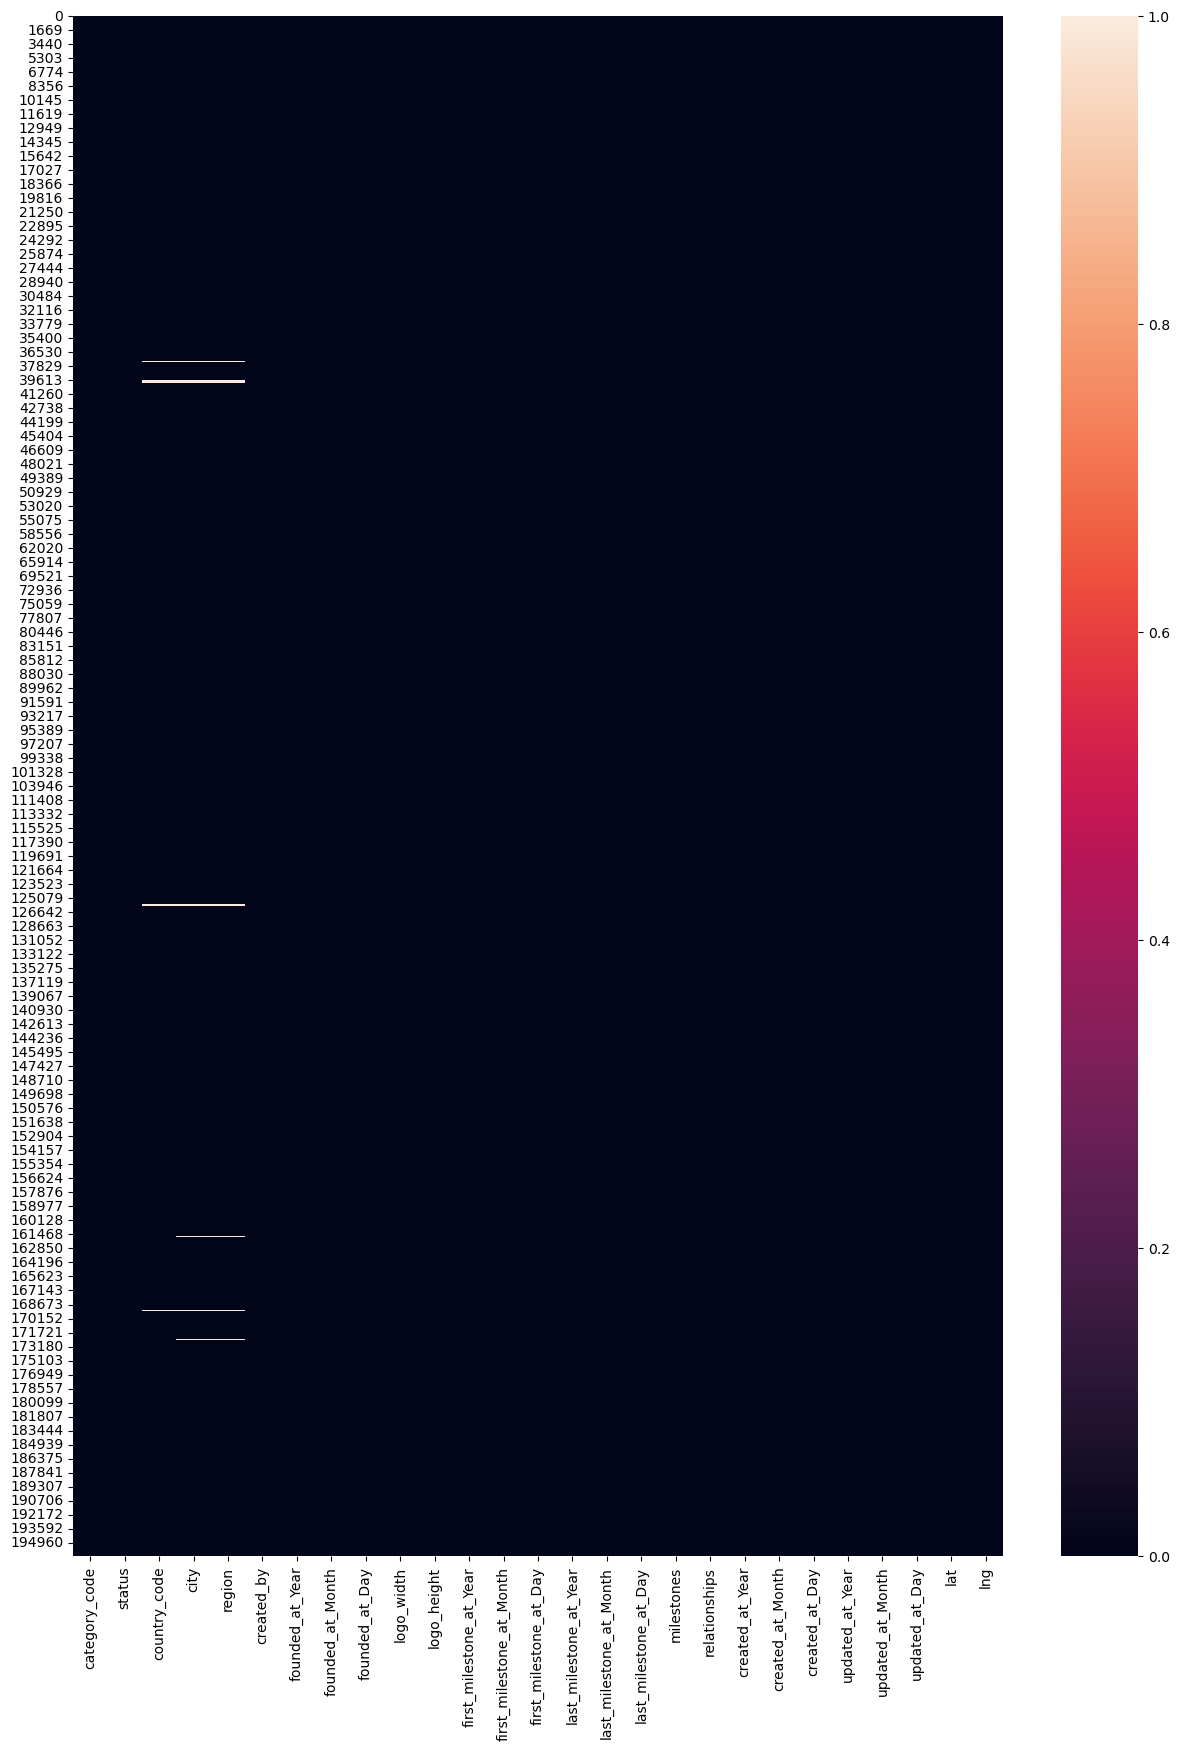

In [159]:
plt.figure(figsize = (15,20))
sns.heatmap(df_miss5.isna())

In [160]:
#Deleting all rows which contain NaN values
df_miss6 = df_miss5.dropna(axis = 0)

In [162]:
df_miss6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32049 entries, 0 to 196541
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   category_code             32049 non-null  object 
 1   status                    32049 non-null  object 
 2   country_code              32049 non-null  object 
 3   city                      32049 non-null  object 
 4   region                    32049 non-null  object 
 5   created_by                32049 non-null  object 
 6   founded_at_Year           32049 non-null  float64
 7   founded_at_Month          32049 non-null  float64
 8   founded_at_Day            32049 non-null  float64
 9   logo_width                32049 non-null  float64
 10  logo_height               32049 non-null  float64
 11  first_milestone_at_Year   32049 non-null  float64
 12  first_milestone_at_Month  32049 non-null  float64
 13  first_milestone_at_Day    32049 non-null  float64
 14  last_miles

#### Handling outliers 